In [ ]:
#for2

In [ ]:
#correct2

In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdFMCS, SDWriter

def read_sdf(file_name):
    suppl = Chem.SDMolSupplier(file_name)
    return [mol for mol in suppl if mol is not None]

import numpy as np

def calculate_rmsd(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1, mol2])
    common_substructure_smarts = mcs.smartsString

    if common_substructure_smarts:
        patt = Chem.MolFromSmarts(common_substructure_smarts)
        match1 = mol1.GetSubstructMatch(patt)
        match2 = mol2.GetSubstructMatch(patt)

        if match1 and match2:
            conf1 = mol1.GetConformer()
            conf2 = mol2.GetConformer()

            rmsd = 0.0
            for i, j in zip(match1, match2):
                pos1 = conf1.GetAtomPosition(i)
                pos2 = conf2.GetAtomPosition(j)
                rmsd += (pos1.x - pos2.x)**2 + (pos1.y - pos2.y)**2 + (pos1.z - pos2.z)**2

            rmsd = np.sqrt(rmsd / len(match1))
            return rmsd

    return 1000  # Default RMSD if no common substructure

mols1 = read_sdf('cPLA2_Hopt_v2_cPLA2_2.sdf')
mols2 = read_sdf('cPLA2_Hopt_v2_cPLA2_2_5_CARC.sdf')

writer = SDWriter('cPLA2_Hopt_v2_cPLA2_2_5_CARC_R.sdf')

for index, mol2 in enumerate(mols2):
    rmsd = 1000  # Default RMSD value if no match is found
    match_found = False
    for mol1 in mols1:
        if (mol2.HasProp('synton_id_1') and mol1.HasProp('synton_id_1') and mol2.GetProp('synton_id_1') == mol1.GetProp('synton_id_1')) or \
           (mol2.HasProp('synton_id_2') and mol1.HasProp('synton_id_2') and mol2.GetProp('synton_id_2') == mol1.GetProp('synton_id_2')):
            rmsd = calculate_rmsd(mol1, mol2)
            match_found = True
            print(f"RMSD for molecule {index}: {rmsd:.4f}")  # Format to 4 decimal places
            break  # Stop searching after the first match

    if not match_found:
        print(f"No match found for molecule {index}, setting RMSD to 1000.0000")

    mol2.SetProp('RMSD', f"{rmsd:.4f}")  # Format to 4 decimal places before writing
    writer.write(mol2)

writer.close()
print("RMSD calculations completed and new SDF file created.")

[13:34:54] Explicit valence for atom # 11 C, 5, is greater than permitted
[13:34:54] ERROR: Could not sanitize molecule ending on line 44892
[13:34:54] ERROR: Explicit valence for atom # 11 C, 5, is greater than permitted
[13:34:54] Explicit valence for atom # 18 C, 5, is greater than permitted
[13:34:54] ERROR: Could not sanitize molecule ending on line 8622
[13:34:54] ERROR: Explicit valence for atom # 18 C, 5, is greater than permitted
[13:34:54] Explicit valence for atom # 18 C, 5, is greater than permitted
[13:34:54] ERROR: Could not sanitize molecule ending on line 17247
[13:34:54] ERROR: Explicit valence for atom # 18 C, 5, is greater than permitted
[13:34:54] Explicit valence for atom # 18 C, 5, is greater than permitted
[13:34:54] ERROR: Could not sanitize molecule ending on line 54041
[13:34:54] ERROR: Explicit valence for atom # 18 C, 5, is greater than permitted
[13:34:54] Explicit valence for atom # 19 C, 5, is greater than permitted
[13:34:54] ERROR: Could not sanitize mo

RMSD for molecule 0: 0.2037
RMSD for molecule 1: 4.2305
RMSD for molecule 2: 0.3015
RMSD for molecule 3: 0.0592
RMSD for molecule 4: 0.0606
RMSD for molecule 5: 3.9170
RMSD for molecule 6: 0.0496
RMSD for molecule 7: 0.1696
RMSD for molecule 8: 0.0884
RMSD for molecule 9: 0.0559
RMSD for molecule 10: 0.0704
RMSD for molecule 11: 0.0692
RMSD for molecule 12: 0.2723
RMSD for molecule 13: 0.2638
RMSD for molecule 14: 1.0874
RMSD for molecule 15: 0.1294
RMSD for molecule 16: 0.1509
RMSD for molecule 17: 0.0878
RMSD for molecule 18: 0.1356
RMSD for molecule 19: 1.0790
RMSD for molecule 20: 0.0743
RMSD for molecule 21: 1.1170
RMSD for molecule 22: 3.8168
RMSD for molecule 23: 0.5713
RMSD for molecule 24: 0.2359
RMSD for molecule 25: 1.1534
RMSD for molecule 26: 1.7612
RMSD for molecule 27: 3.8190
RMSD for molecule 28: 0.1169
RMSD for molecule 29: 0.1751
RMSD for molecule 30: 1.0690
RMSD for molecule 31: 0.1969
RMSD for molecule 32: 2.3554
RMSD for molecule 33: 0.2553
RMSD for molecule 34: 0.

In [ ]:
#for3

In [ ]:
#correct3

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdFMCS, SDWriter
import numpy as np

def read_sdf(file_name):
    suppl = Chem.SDMolSupplier(file_name)
    return [mol for mol in suppl if mol is not None]

def calculate_rmsd(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1, mol2])
    common_substructure_smarts = mcs.smartsString
    if common_substructure_smarts:
        patt = Chem.MolFromSmarts(common_substructure_smarts)
        match1 = mol1.GetSubstructMatch(patt)
        match2 = mol2.GetSubstructMatch(patt)
        if match1 and match2:
            conf1 = mol1.GetConformer()
            conf2 = mol2.GetConformer()

            rmsd = 0.0
            for i, j in zip(match1, match2):
                pos1 = conf1.GetAtomPosition(i)
                pos2 = conf2.GetAtomPosition(j)
                rmsd += (pos1.x - pos2.x)**2 + (pos1.y - pos2.y)**2 + (pos1.z - pos2.z)**2

            rmsd = np.sqrt(rmsd / len(match1))
            return rmsd
    return 1000  # Default RMSD if no common substructure

mols1 = read_sdf('cPLA2_Hopt_v2_cPLA2_3_1f.sdf')
mols2 = read_sdf('cPLA2_Hopt_v2_cPLA2_3_2f_CARC_5.sdf')

writer = SDWriter('cPLA2_Hopt_v2_cPLA2_3_2f_CARC_5_R.sdf')

for index, mol2 in enumerate(mols2):
    rmsd = 1000  # Default RMSD value if no match is found
    match_found = False
    for mol1 in mols1:
        # Check for matching synthons
        if (mol2.HasProp('synton_id_1') and mol1.HasProp('synton_id_1') and mol2.GetProp('synton_id_1') == mol1.GetProp('synton_id_1')) or \
           (mol2.HasProp('synton_id_2') and mol1.HasProp('synton_id_2') and mol2.GetProp('synton_id_2') == mol1.GetProp('synton_id_2')) or \
           (mol2.HasProp('synton_id_3') and mol1.HasProp('synton_id_3') and mol2.GetProp('synton_id_3') == mol1.GetProp('synton_id_3')):
            rmsd = calculate_rmsd(mol1, mol2)
            match_found = True
            print(f"RMSD for molecule {index}: {rmsd:.4f}") 
            break  # Stop searching after the first match

    if not match_found:
        print(f"No match found for molecule {index}, setting RMSD to 1000.0000")

    mol2.SetProp('RMSD', f"{rmsd:.4f}")  
    writer.write(mol2)

writer.close()
print("RMSD calculations completed and new SDF file created.")

[02:23:43] Explicit valence for atom # 13 C, 5, is greater than permitted
[02:23:43] ERROR: Could not sanitize molecule ending on line 6987910
[02:23:43] ERROR: Explicit valence for atom # 13 C, 5, is greater than permitted
[02:23:43] Explicit valence for atom # 13 C, 5, is greater than permitted
[02:23:43] ERROR: Could not sanitize molecule ending on line 7082570
[02:23:43] ERROR: Explicit valence for atom # 13 C, 5, is greater than permitted
[02:23:43] Explicit valence for atom # 13 C, 5, is greater than permitted
[02:23:43] ERROR: Could not sanitize molecule ending on line 7085161
[02:23:43] ERROR: Explicit valence for atom # 13 C, 5, is greater than permitted
[02:23:49] Explicit valence for atom # 13 C, 5, is greater than permitted
[02:23:49] ERROR: Could not sanitize molecule ending on line 10379862
[02:23:49] ERROR: Explicit valence for atom # 13 C, 5, is greater than permitted
[02:23:49] Explicit valence for atom # 13 C, 5, is greater than permitted
[02:23:49] ERROR: Could not s

RMSD for molecule 0: 3.8302
RMSD for molecule 1: 1.7624
RMSD for molecule 2: 0.2335
RMSD for molecule 3: 1.7136
RMSD for molecule 4: 0.2550
RMSD for molecule 5: 1.1155
RMSD for molecule 6: 0.9602
RMSD for molecule 7: 1.9721
RMSD for molecule 8: 0.1186
RMSD for molecule 9: 0.1964
RMSD for molecule 10: 1.1740
RMSD for molecule 11: 0.7635
RMSD for molecule 12: 4.3469
RMSD for molecule 13: 0.2446
RMSD for molecule 14: 1.1040
RMSD for molecule 15: 0.8653
RMSD for molecule 16: 1.0377
RMSD for molecule 17: 1.0327
RMSD for molecule 18: 0.7348
RMSD for molecule 19: 0.3354
RMSD for molecule 20: 0.7460
RMSD for molecule 21: 0.1227
RMSD for molecule 22: 1.1680
RMSD for molecule 23: 0.4414
RMSD for molecule 24: 0.4338
RMSD for molecule 25: 9.3815
RMSD for molecule 26: 0.4449
RMSD for molecule 27: 1.6153
RMSD for molecule 28: 1.4044
RMSD for molecule 29: 1.7531
RMSD for molecule 30: 0.7270
RMSD for molecule 31: 0.3262
RMSD for molecule 32: 0.8530
RMSD for molecule 33: 0.6470
RMSD for molecule 34: 0.

In [ ]:
#for275572

In [ ]:
#correct275592

In [ ]:
from rdkit.Chem import AllChem, rdFMCS, SDWriter
import numpy as np

def read_sdf(file_name):
    suppl = Chem.SDMolSupplier(file_name)
    return [mol for mol in suppl if mol is not None]

def calculate_rmsd(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1, mol2])
    common_substructure_smarts = mcs.smartsString
    if common_substructure_smarts:
        patt = Chem.MolFromSmarts(common_substructure_smarts)
        match1 = mol1.GetSubstructMatch(patt)
        match2 = mol2.GetSubstructMatch(patt)
        if match1 and match2:
            conf1 = mol1.GetConformer()
            conf2 = mol2.GetConformer()

            rmsd = 0.0
            for i, j in zip(match1, match2):
                pos1 = conf1.GetAtomPosition(i)
                pos2 = conf2.GetAtomPosition(j)
                rmsd += (pos1.x - pos2.x)**2 + (pos1.y - pos2.y)**2 + (pos1.z - pos2.z)**2

            rmsd = np.sqrt(rmsd / len(match1))
            return rmsd
    return 1000  # Default RMSD if no common substructure

def synthon_match(mol1, mol2):
    for i in range(1, 4):
        for j in range(1, 4):
            prop_name_1 = f'synton_id_{i}'
            prop_name_2 = f'synton_id_{j}'
            if mol1.HasProp(prop_name_1) and mol2.HasProp(prop_name_2) and mol1.GetProp(prop_name_1) == mol2.GetProp(prop_name_2):
                return True
    return False

mols1 = read_sdf('cPLA2_Hopt_v2_cPLA2_275592.sdf')
mols2 = read_sdf('cPLA2_Hopt_v2_cPLA2_275592_5_CARC.sdf')

writer = SDWriter('cPLA2_Hopt_v2_cPLA2_275592_5_CARC_R.sdf')

for index, mol2 in enumerate(mols2):
    rmsd = 1000  # Default RMSD value if no match is found
    match_found = False

    for mol1 in mols1:
        if synthon_match(mol1, mol2):
            rmsd = calculate_rmsd(mol1, mol2)
            match_found = True
            print(f"RMSD for molecule {index}: {rmsd:.4f}")  # Format to 4 decimal places
            break  # Stop searching after the first match

    if not match_found:
        print(f"No match found for molecule {index}, setting RMSD to 1000.0000")

    mol2.SetProp('RMSD', f"{rmsd:.4f}")  # Format to 4 decimal places before writing
    writer.write(mol2)

writer.close()
print("RMSD calculations completed and new SDF file created.")

In [ ]:
#draw

C:\Users\Antonina Nazarova\AppData\Local\Temp\ipykernel_13212\2041732397.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(pd.DataFrame(data), ignore_index=True)
C:\Users\Antonina Nazarova\AppData\Local\Temp\ipykernel_13212\2041732397.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(pd.DataFrame(data), ignore_index=True)
C:\Users\Antonina Nazarova\AppData\Local\Temp\ipykernel_13212\2041732397.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(pd.DataFrame(data), ignore_index=True)
[07:19:50] ERROR: EOF hit while reading atoms
[07:19:50] ERROR: moving to the beginning of the next molecule
C:\Users\Antonina Nazarova\AppData\Local\Temp\ip

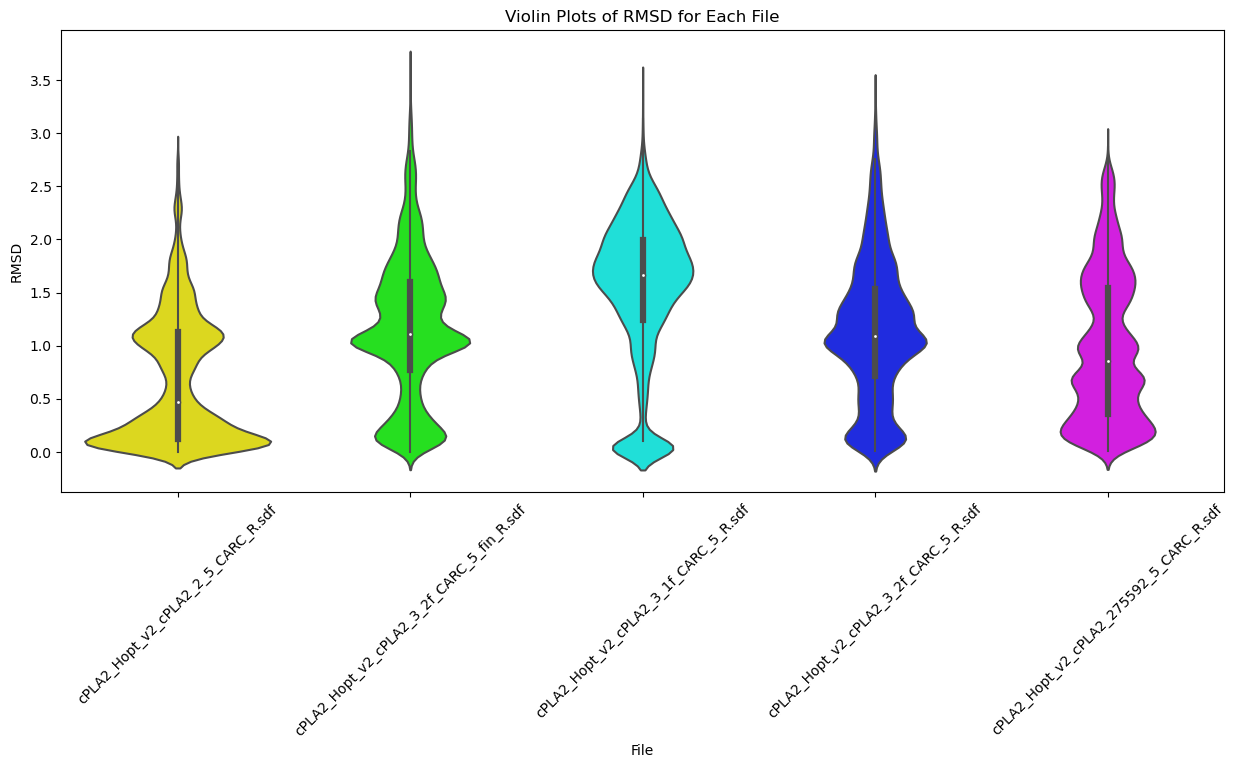

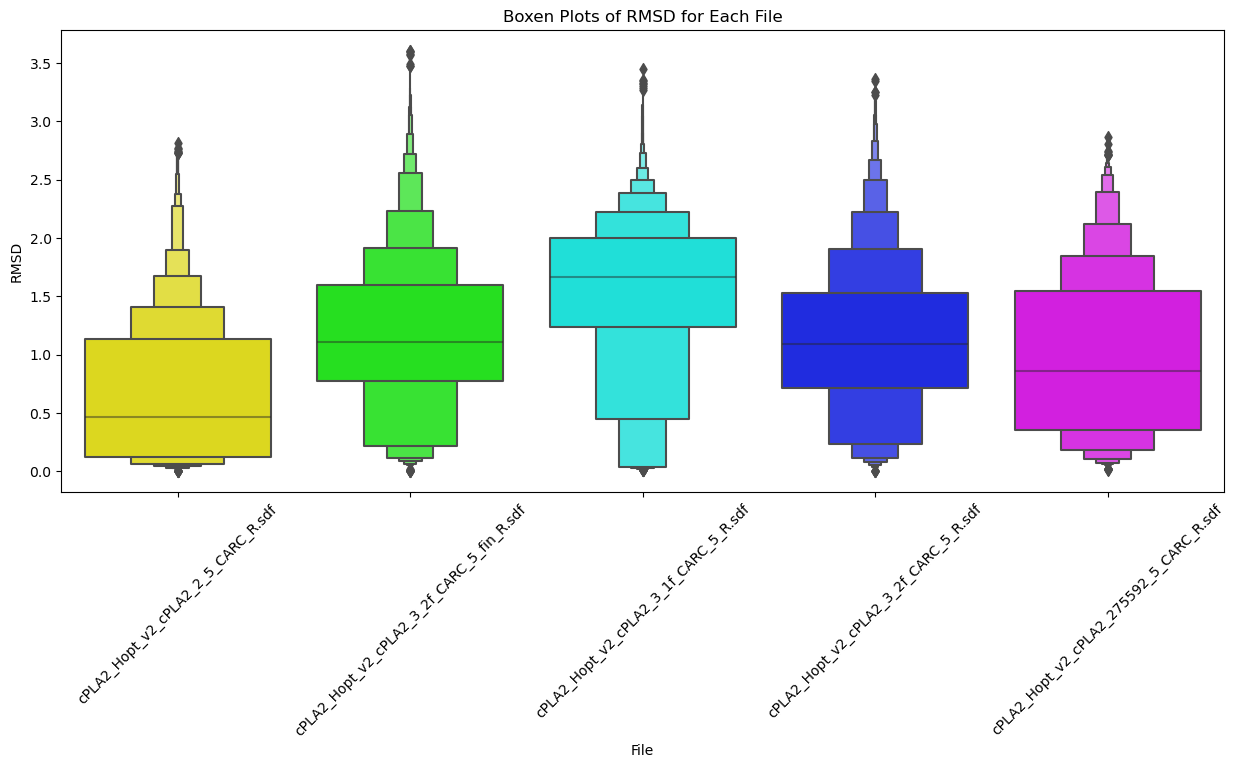

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem

# List of SDF files
sdf_files = [
    'cPLA2_Hopt_v2_cPLA2_2_5_CARC_R.sdf', 
    'cPLA2_Hopt_v2_cPLA2_3_2f_CARC_5_fin_R.sdf', 
    'cPLA2_Hopt_v2_cPLA2_3_1f_CARC_5_R.sdf', 
    'cPLA2_Hopt_v2_cPLA2_3_2f_CARC_5_R.sdf',
    'cPLA2_Hopt_v2_cPLA2_275592_5_CARC_R.sdf'
]

# Generate a vibrant and electric color palette
color_palette = sns.color_palette("hsv", 5)

# Create an empty DataFrame for all data
all_data = pd.DataFrame()

# Iterate over SDF files and accumulate data
for sdf_file in sdf_files:
    supplier = Chem.SDMolSupplier(sdf_file)
    data = []
    for mol in supplier:
        if mol is not None:
            rmsd = float(mol.GetProp('RMSD')) if mol.HasProp('RMSD') else None
            data.append({'RMSD': rmsd, 'File': sdf_file})
    all_data = all_data.append(pd.DataFrame(data), ignore_index=True)

# Filter RMSD values
all_data = all_data[(all_data['RMSD'] >= 0) & (all_data['RMSD'] <= 10)]

# Create Violin Plot for all files
plt.figure(figsize=(15, 6))
sns.violinplot(x='File', y='RMSD', data=all_data, palette=color_palette)
plt.title('Violin Plots of RMSD for Each File')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.savefig('combined_violin_plots.png')
plt.show()

# Create Boxen Plot for all files
plt.figure(figsize=(15, 6))
sns.boxenplot(x='File', y='RMSD', data=all_data, palette=color_palette)
plt.title('Boxen Plots of RMSD for Each File')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.savefig('combined_boxen_plots.png')
plt.show()
